In [1]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium.plugins import HeatMap

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv("Crimes_-_2025_20250701.csv")

In [4]:
df.head()

ID Case Number                    Date                   Block  IUCR  \
0  13881590    JJ310970  06/25/2025 09:52:00 PM    028XX N CLYBOURN AVE  0820   
1  13877824    JJ305049  06/23/2025 12:00:00 AM       003XX N DAMEN AVE  0460   
2  13876686    JJ305111  06/23/2025 12:00:00 AM        0000X E HURON ST  1320   
3  13879110    JJ308014  06/23/2025 12:00:00 AM  078XX S SOUTH SHORE DR  2825   
4  13877595    JJ305673  06/23/2025 12:00:00 AM         031XX W 41ST ST  1320   

      Primary Type              Description  \
0            THEFT           $500 AND UNDER   
1          BATTERY                   SIMPLE   
2  CRIMINAL DAMAGE               TO VEHICLE   
3    OTHER OFFENSE  HARASSMENT BY TELEPHONE   
4  CRIMINAL DAMAGE               TO VEHICLE   

                                Location Description  Arrest  Domestic  Beat  \
0  VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER...   False     False  1931   
1                                           SIDEWALK   False     False  1223   
2             PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  1834   
3                                    OTHER (SPECIFY)   False     False   421   
4                                          RESIDENCE   False     False   921   

   District  Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
0        19    32             5.0       06     1162340.0     1918779.0  2025   
1        12    27            28.0      08B     1163020.0     1902096.0  2025   
2        18     2             8.0       14     1176420.0     1905077.0  2025   
3         4     7            43.0       26     1197898.0     1853963.0  2025   
4         9    12            58.0       14     1156067.0     1877270.0  2025   

               Updated On   Latitude  Longitude  \
0  06/30/2025 03:41:47 PM  41.932792 -87.678829   
1  06/30/2025 03:42:36 PM  41.886998 -87.676800   
2  06/30/2025 03:42:36 PM  41.894886 -87.627502   
3  06/30/2025 03:42:36 PM  41.754116 -87.550332   
4  06/30/2025 03:42:36 PM  41.819016 -87.703002   

                             Location  
0  POINT (-87.678829433 41.932791929)  
1  POINT (-87.676799774 41.886998323)  
2  POINT (-87.627501647 41.894886472)  
3   POINT (-87.55033154 41.754115911)  
4  POINT (-87.703002406 41.819016131)

In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=108257, step=1)

In [7]:
df.shape

(108257, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    108257 non-null  int64  
 1   Case Number           108257 non-null  object 
 2   Date                  108257 non-null  object 
 3   Block                 108257 non-null  object 
 4   IUCR                  108257 non-null  object 
 5   Primary Type          108257 non-null  object 
 6   Description           108257 non-null  object 
 7   Location Description  107892 non-null  object 
 8   Arrest                108257 non-null  bool   
 9   Domestic              108257 non-null  bool   
 10  Beat                  108257 non-null  int64  
 11  District              108257 non-null  int64  
 12  Ward                  108257 non-null  int64  
 13  Community Area        108254 non-null  float64
 14  FBI Code              108257 non-null  object 
 15  

In [9]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [10]:
df.describe()

ID           Beat       District           Ward  \
count  1.082570e+05  108257.000000  108257.000000  108257.000000   
mean   1.377184e+07    1144.056043      11.211386      23.077556   
std    5.598528e+05     708.109110       7.077160      13.886990   
min    2.854500e+04     111.000000       1.000000       1.000000   
25%    1.375256e+07     531.000000       5.000000      10.000000   
50%    1.379484e+07    1031.000000      10.000000      23.000000   
75%    1.383642e+07    1731.000000      17.000000      34.000000   
max    1.388462e+07    2535.000000      31.000000      50.000000   

       Community Area  X Coordinate  Y Coordinate      Year       Latitude  \
count   108254.000000  1.081770e+05  1.081770e+05  108257.0  108177.000000   
mean        36.575110  1.165521e+06  1.887024e+06    2025.0      41.845571   
std         21.542719  1.635781e+04  3.148374e+04       0.0       0.086579   
min          1.000000  1.093568e+06  1.813897e+06    2025.0      41.644590   
25%         23.000000  1.153993e+06  1.860070e+06    2025.0      41.771521   
50%         32.000000  1.167490e+06  1.893389e+06    2025.0      41.863013   
75%         53.000000  1.176817e+06  1.909741e+06    2025.0      41.908258   
max         77.000000  1.205119e+06  1.951517e+06    2025.0      42.022559   

           Longitude  
count  108177.000000  
mean      -87.668087  
std         0.059563  
min       -87.931147  
25%       -87.710013  
50%       -87.660610  
75%       -87.626638  
max       -87.524529

In [11]:
df.duplicated().sum() # no duplicates are present

0

In [12]:
df.isnull().sum()  # checking for nan/ null values

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    365
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             80
Y Coordinate             80
Year                      0
Updated On                0
Latitude                 80
Longitude                80
Location                 80
dtype: int64

In [13]:
df['Location Description'] = df['Location Description'].fillna('missing')   # filling location 

In [14]:
df.dropna(axis=0, inplace=True)   # droping the values with empty spaces which can not be  filled

In [15]:
df.isnull().sum() # checking f eormpty or null values

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [16]:
# setting datatype of date and time 
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [17]:
# encoding Arrest 
pd.get_dummies(df['Arrest'])
df['Arrest'] = df['Arrest'].map({True : 1 , False : 0 })

In [18]:
# encoding Domestic
pd.get_dummies(df['Domestic'])
df['Domestic'] = df['Domestic'].map({True : 1 , False : 0 })

In [19]:
df.head()

ID Case Number                Date                   Block  IUCR  \
0  13881590    JJ310970 2025-06-25 21:52:00    028XX N CLYBOURN AVE  0820   
1  13877824    JJ305049 2025-06-23 00:00:00       003XX N DAMEN AVE  0460   
2  13876686    JJ305111 2025-06-23 00:00:00        0000X E HURON ST  1320   
3  13879110    JJ308014 2025-06-23 00:00:00  078XX S SOUTH SHORE DR  2825   
4  13877595    JJ305673 2025-06-23 00:00:00         031XX W 41ST ST  1320   

      Primary Type              Description  \
0            THEFT           $500 AND UNDER   
1          BATTERY                   SIMPLE   
2  CRIMINAL DAMAGE               TO VEHICLE   
3    OTHER OFFENSE  HARASSMENT BY TELEPHONE   
4  CRIMINAL DAMAGE               TO VEHICLE   

                                Location Description  Arrest  Domestic  Beat  \
0  VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER...       0         0  1931   
1                                           SIDEWALK       0         0  1223   
2             PARKING LOT / GARAGE (NON RESIDENTIAL)       0         0  1834   
3                                    OTHER (SPECIFY)       0         0   421   
4                                          RESIDENCE       0         0   921   

   District  Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
0        19    32             5.0       06     1162340.0     1918779.0  2025   
1        12    27            28.0      08B     1163020.0     1902096.0  2025   
2        18     2             8.0       14     1176420.0     1905077.0  2025   
3         4     7            43.0       26     1197898.0     1853963.0  2025   
4         9    12            58.0       14     1156067.0     1877270.0  2025   

               Updated On   Latitude  Longitude  \
0  06/30/2025 03:41:47 PM  41.932792 -87.678829   
1  06/30/2025 03:42:36 PM  41.886998 -87.676800   
2  06/30/2025 03:42:36 PM  41.894886 -87.627502   
3  06/30/2025 03:42:36 PM  41.754116 -87.550332   
4  06/30/2025 03:42:36 PM  41.819016 -87.703002   

                             Location  
0  POINT (-87.678829433 41.932791929)  
1  POINT (-87.676799774 41.886998323)  
2  POINT (-87.627501647 41.894886472)  
3   POINT (-87.55033154 41.754115911)  
4  POINT (-87.703002406 41.819016131)

In [20]:
df.to_csv('crime_cleandata.csv' ,index= False)

In [21]:
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [22]:
plt.style.use('seaborn-v0_8-darkgrid')

# What are the most common crime types?	Shows major crime issues

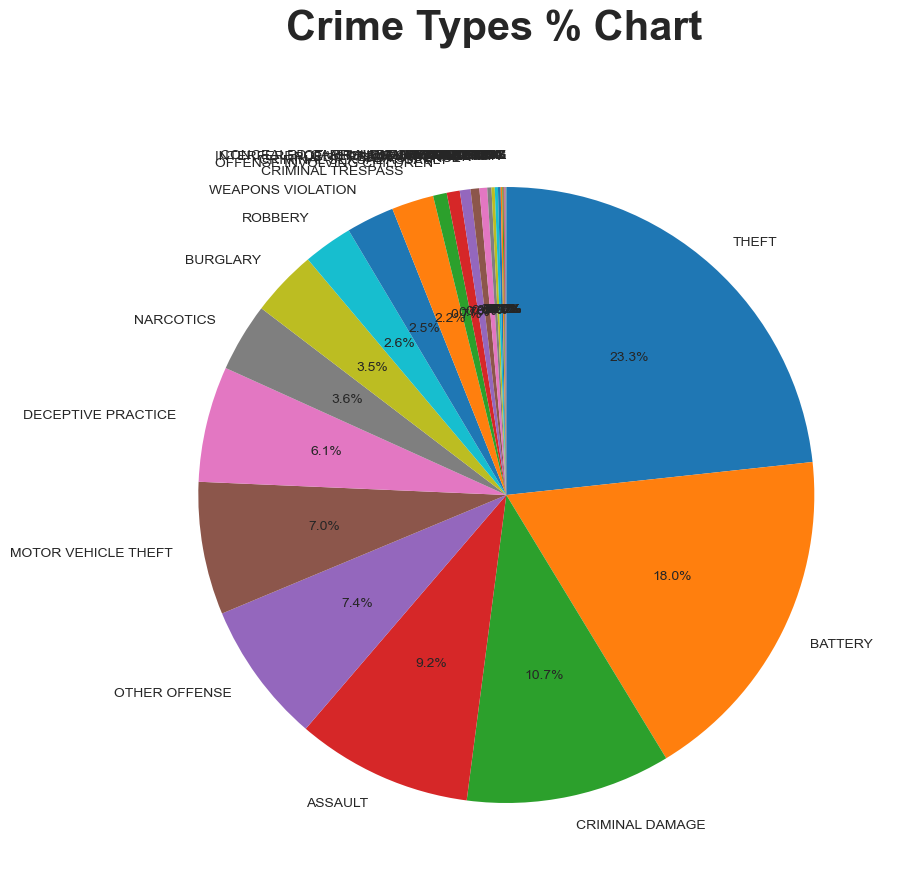

In [23]:
crime_count = df['Primary Type'].value_counts()

fig , ax = plt.subplots(figsize=(10, 10))
ax.pie(
    crime_count.values,                     # First argument: sizes
    labels=crime_count.index,               # Labels
    autopct='%1.1f%%',                      # Show % on slices
    startangle=90,                           # Start at the top
    counterclock=False                      # Pie direction
)
fig.suptitle('Crime Types % Chart', fontsize = 30 , fontweight='bold')
plt.show()

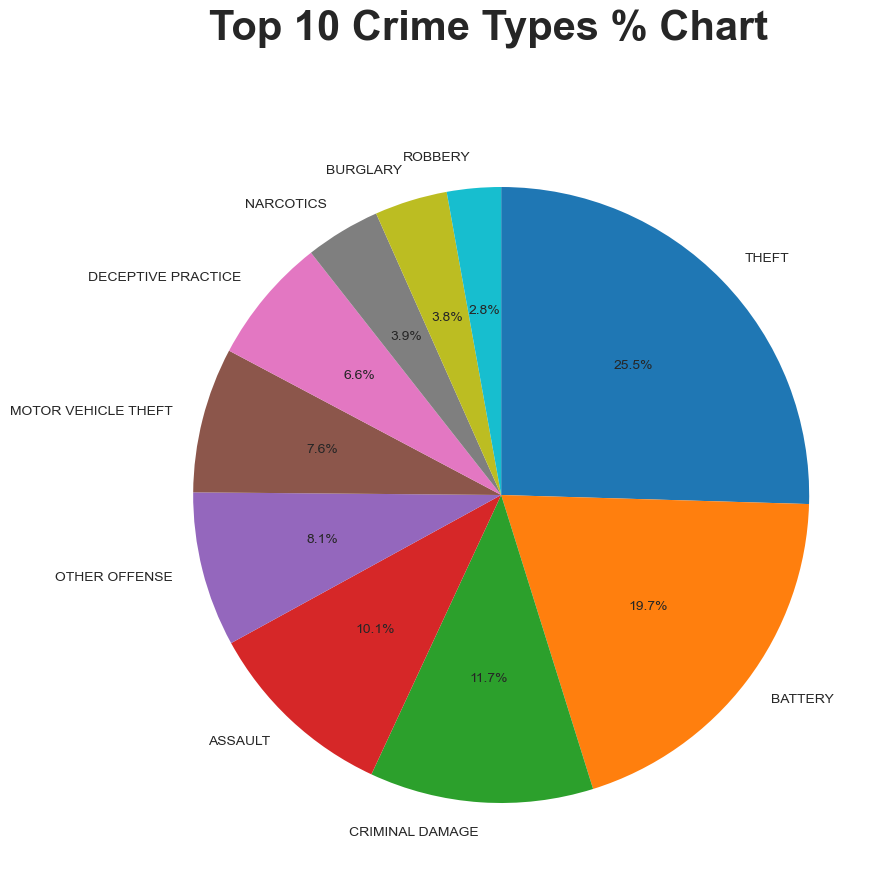

In [24]:
crime_count = df['Primary Type'].value_counts()[:10]

fig , ax = plt.subplots(figsize=(10, 10))
ax.pie(
    crime_count.values,                     # First argument: sizes
    labels=crime_count.index,               # Labels
    autopct='%1.1f%%',                      # Show % on slices
    startangle=90,                           # Start at the top
    counterclock=False                      # Pie direction
)
fig.suptitle('Top 10 Crime Types % Chart', fontsize = 30 , fontweight='bold')
plt.show()

### Discription: 
The above charts shows the crime types and there percent, the theft is the most common , because it is registered most

# Arrest Status

In [25]:
pd.DataFrame(df.groupby(['Primary Type', 'Arrest']).size().unstack())

Arrest                                   0       1
Primary Type                                      
ARSON                                169.0    13.0
ASSAULT                             8791.0  1196.0
BATTERY                            15900.0  3596.0
BURGLARY                            3598.0   181.0
CONCEALED CARRY LICENSE VIOLATION      4.0   147.0
CRIMINAL DAMAGE                    11097.0   521.0
CRIMINAL SEXUAL ASSAULT              727.0    13.0
CRIMINAL TRESPASS                   1646.0   744.0
DECEPTIVE PRACTICE                  6375.0   198.0
GAMBLING                               NaN     6.0
HOMICIDE                             138.0    41.0
HUMAN TRAFFICKING                      6.0     NaN
INTERFERENCE WITH PUBLIC OFFICER      45.0   395.0
INTIMIDATION                          53.0     1.0
KIDNAPPING                            47.0     4.0
LIQUOR LAW VIOLATION                   6.0    89.0
MOTOR VEHICLE THEFT                 7274.0   268.0
NARCOTICS                            190.0  3708.0
NON-CRIMINAL                           NaN     3.0
OBSCENITY                             10.0    16.0
OFFENSE INVOLVING CHILDREN           737.0    40.0
OTHER NARCOTIC VIOLATION               3.0     3.0
OTHER OFFENSE                       6271.0  1763.0
PROSTITUTION                           5.0    61.0
PUBLIC INDECENCY                       NaN     6.0
PUBLIC PEACE VIOLATION               257.0   241.0
ROBBERY                             2613.0   190.0
SEX OFFENSE                          569.0    39.0
STALKING                             230.0    10.0
THEFT                              22812.0  2383.0
WEAPONS VIOLATION                    623.0  2102.0

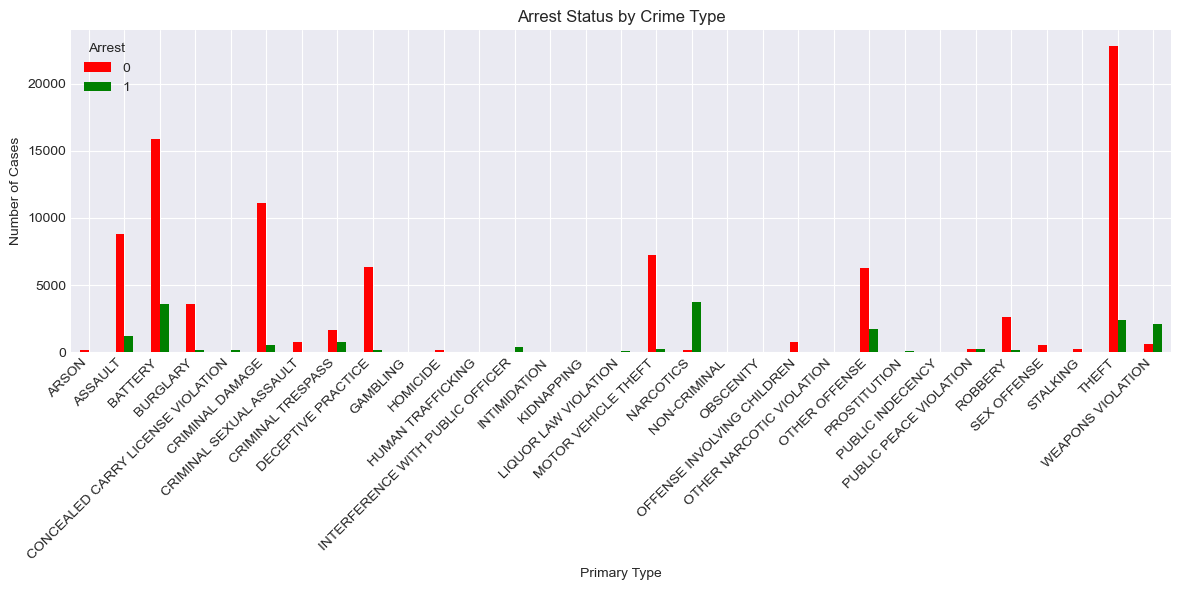

In [26]:
df.groupby(['Primary Type', 'Arrest']).size().unstack().plot(kind='bar',color= ['red','green'], stacked=False, figsize=(12, 6))
plt.title('Arrest Status by Crime Type')
plt.ylabel('Number of Cases')
plt.xlabel('Primary Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
df['Arrest'].value_counts()

Arrest
0    90196
1    17978
Name: count, dtype: int64

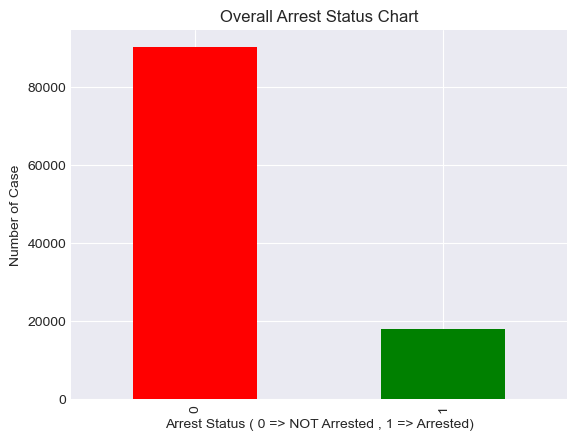

In [28]:
df['Arrest'].value_counts().plot(kind= 'bar' ,color= ['red','green'])
plt.title('Overall Arrest Status Chart')
plt.xlabel('Arrest Status ( 0 => NOT Arrested , 1 => Arrested)')
plt.ylabel('Number of Case')
plt.xticks(rotation = 90)
plt.show()

### Discription :
These graphs shows maximum criminal are not Arrested ,  90196 => NOT Arrested ,  17978=> Arrested

# Crime in Districts , Community Areas

In [29]:
df['District'].value_counts()

District
8     7103
12    6440
6     6260
11    6225
1     6180
4     6041
2     5763
18    5752
3     5711
19    5600
25    5359
7     4677
9     4648
10    4475
5     4309
15    3779
16    3661
14    3547
22    3497
24    3463
17    3334
20    2338
31      12
Name: count, dtype: int64

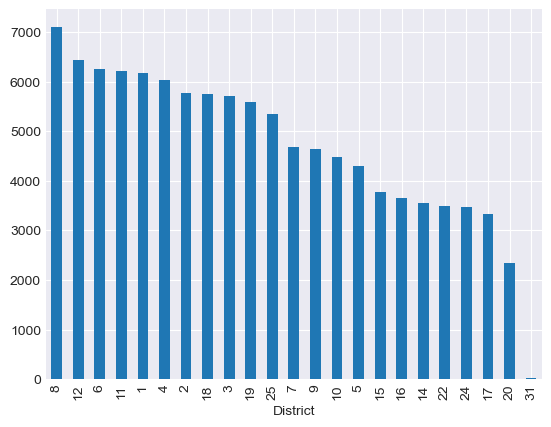

In [30]:
df['District'].value_counts().plot(kind= 'bar')
plt.show()

In [31]:
df['Community Area'].value_counts()

Community Area
25.0    5730
8.0     4834
28.0    4504
32.0    3834
43.0    3688
        ... 
18.0     286
74.0     229
12.0     185
9.0      154
47.0     118
Name: count, Length: 77, dtype: int64

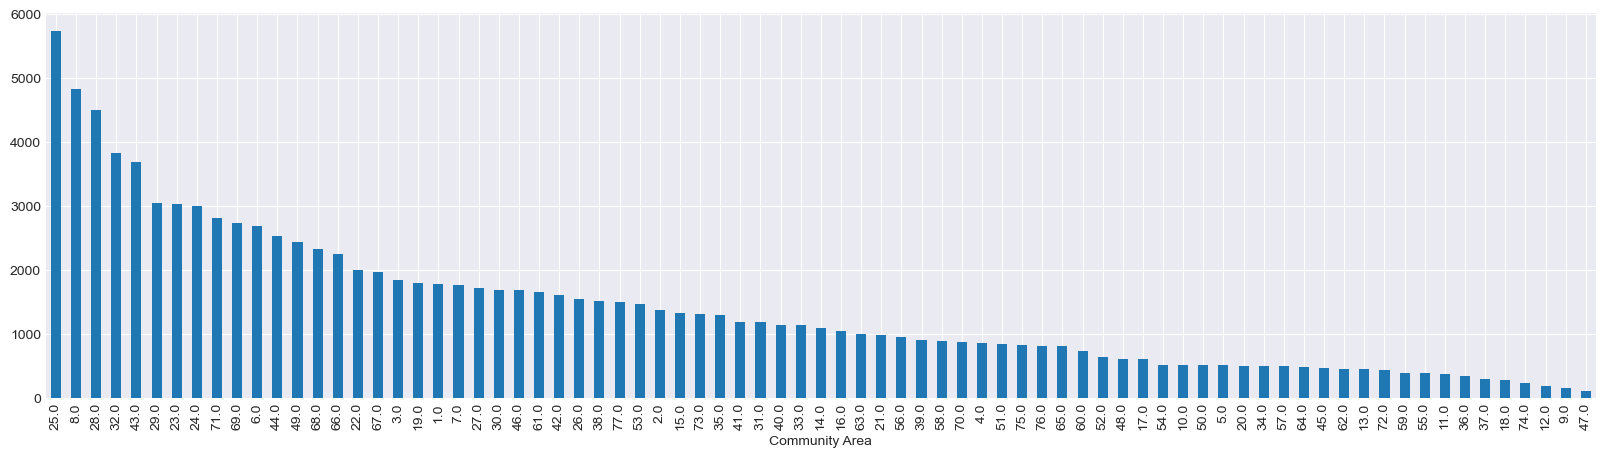

In [32]:
df['Community Area'].value_counts().plot(kind= 'bar', figsize = (20,5))
plt.show()

### Discription :
The above Graphs shows the Crime Registered in District level and Area level

# Where (location description) does crime happen most?	Understand risky places

In [33]:
df['Location Description'].value_counts()

Location Description
STREET                27531
APARTMENT             21804
RESIDENCE             12978
SIDEWALK               5227
SMALL RETAIL STORE     4464
                      ...  
FARM                      1
NEWSSTAND                 1
VACANT LOT                1
GARAGE                    1
TAVERN                    1
Name: count, Length: 120, dtype: int64

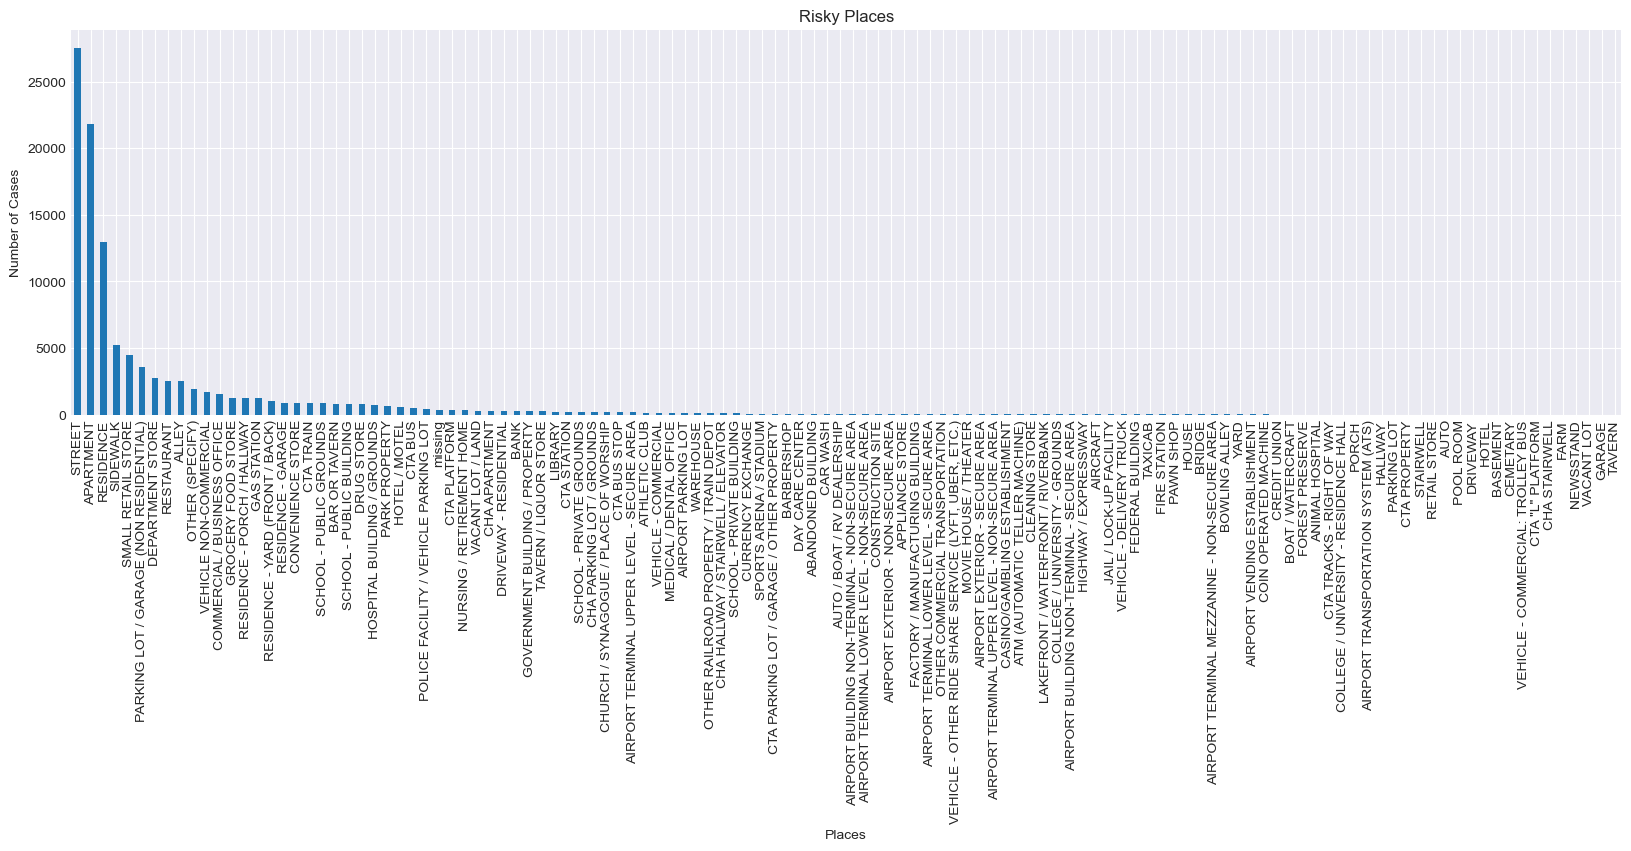

In [34]:
df['Location Description'].value_counts().plot(kind= 'bar', figsize = (20,5))
plt.title("Risky Places")
plt.xlabel('Places')
plt.ylabel('Number of Cases')
plt.show()

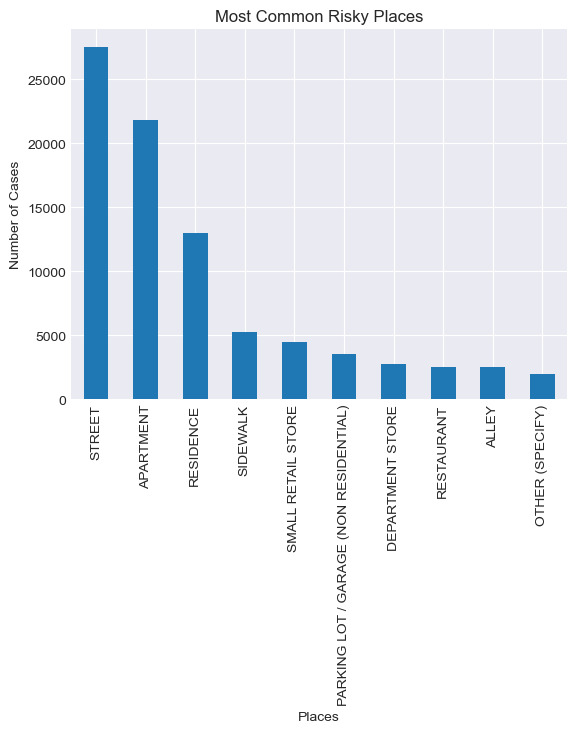

In [35]:
df['Location Description'].value_counts()[:10].plot(kind= 'bar',)
plt.title('Most Common Risky Places')
plt.xlabel('Places')
plt.ylabel('Number of Cases')
plt.show()

### Discription : 
The above mentioned Areas are top 10 risky areas where crime are maximum

# Which months or years have more crimes?	Shows trends over time

In [36]:
df['Month_Num'] = df['Date'].dt.month


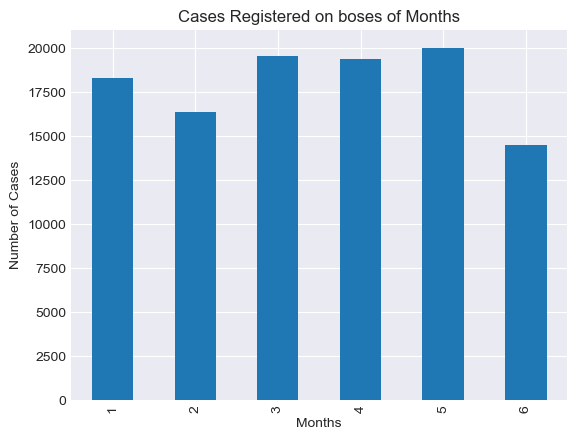

In [37]:
df['Month_Num'].value_counts().sort_index().plot(kind= 'bar')
plt.title('Cases Registered on boses of Months')
plt.xlabel("Months")
plt.ylabel('Number of Cases')
plt.show()

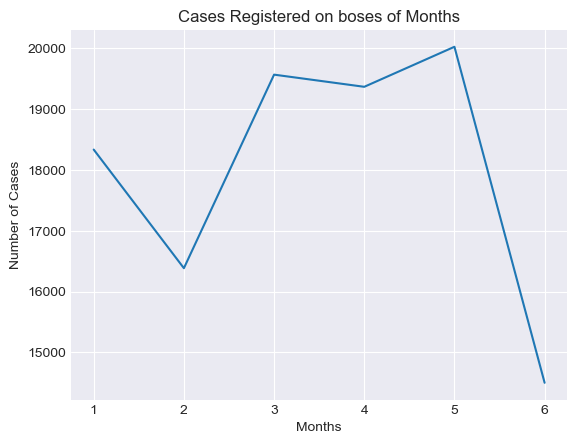

In [38]:
df['Month_Num'].value_counts().sort_index().plot()
plt.title('Cases Registered on boses of Months')
plt.xlabel("Months")
plt.ylabel('Number of Cases')
plt.show()

### Discription: 
The Graphs shows that June have least crime rigistered and May have highest crime registered , the graphs is not linear and have irregular shape

# What time of day has more crimes?	Identify peak crime hours

In [39]:
df['Time'] = df['Date'].dt.hour
# 0 = 12 AM  
# 1 = 1 AM  
# ...  
# 12 = Noon  
# ...  
# 23 = 11 PM

In [40]:
df['Time'].value_counts()

Time
0     7227
12    6213
15    6107
16    5901
17    5847
19    5720
18    5708
20    5442
14    5399
13    4993
21    4948
11    4918
10    4704
9     4600
22    4485
23    4210
8     3824
1     3404
2     2946
7     2833
3     2699
4     2091
6     2035
5     1920
Name: count, dtype: int64

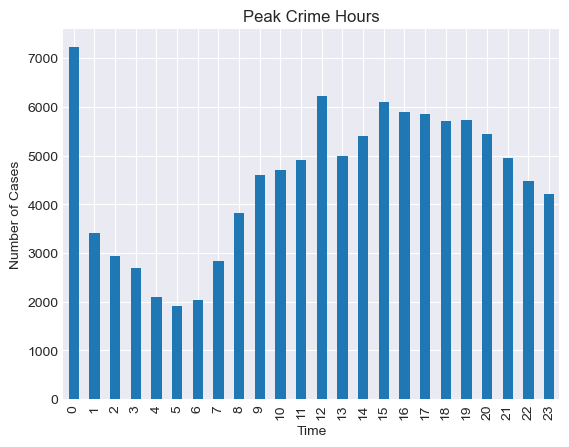

In [41]:
df['Time'].value_counts().sort_index().plot(kind= 'bar')
plt.title('Peak Crime Hours')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.show()

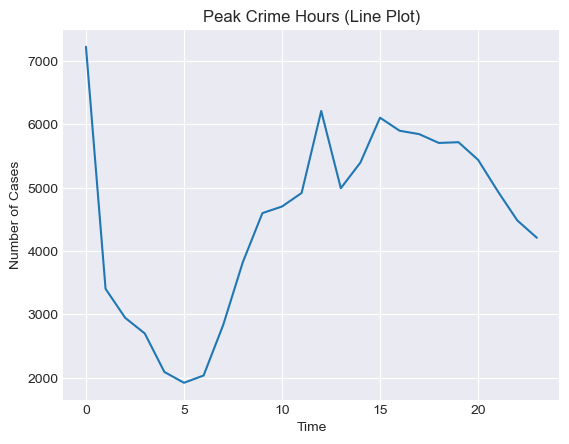

In [42]:
df['Time'].value_counts().sort_index().plot()
plt.title('Peak Crime Hours (Line Plot)')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.show()

### Discription: 
The crime is Maximum from morining 9 am  to night 12 am  , it is minimum between 1 am to 8 am 
> in this chart i am mentioning the time in which above 4000 case registered otherwise , every time is peak time

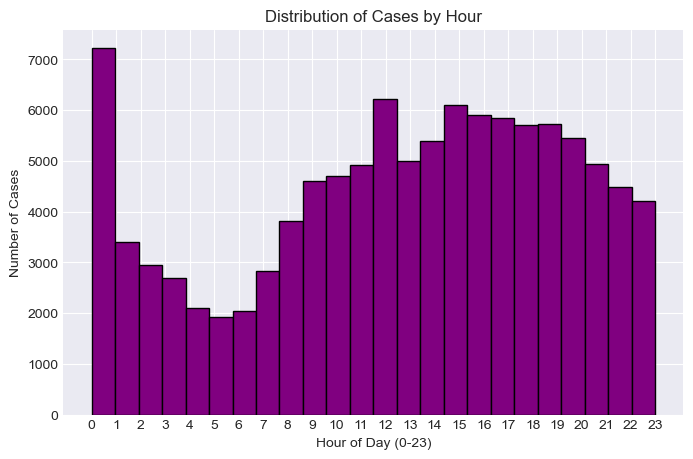

In [43]:
plt.figure(figsize=(8,5))
plt.hist(df['Time'], bins=24, color='purple', edgecolor='black')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Hour')
plt.xticks(range(0, 24))
plt.show()

### Discription : 
Thsi Graph is bimodel ,  After midnight, there is a sharp decline.

# Creating a Map

In [44]:
sample_df = df.sample(500, random_state=42)  # For reproducibility

In [45]:
# Center map on average location of the sample
map_center = [sample_df['Latitude'].mean(), sample_df['Longitude'].mean()]

In [46]:
# Create the base map
crime_map = folium.Map(location=map_center, zoom_start=11)

In [47]:
for idx, row in sample_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Primary Type'],   # This shows the crime type when you click
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(crime_map)

In [48]:
crime_map

#  Heatmap for Crime Density

In [49]:
heat_data = df[['Latitude', 'Longitude']].values.tolist()

# Create heatmap
heat_map = folium.Map(location=map_center, zoom_start=11)
HeatMap(heat_data).add_to(heat_map)

In [50]:
heat_map